In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image
image_path = 'landscape.jpg'
image = cv2.imread(image_path)

In [4]:
# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

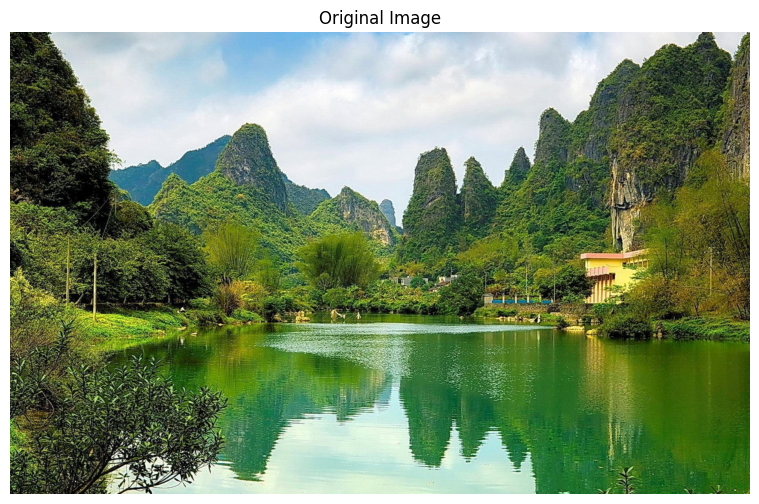

In [5]:
# Display the original image
plt.figure(figsize=(12, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [6]:
# Function to plot histograms
def plot_histogram(image, title, ax, color):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
    ax.plot(bin_edges[0:-1], histogram, color=color)
    ax.set_xlim(0, 255)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

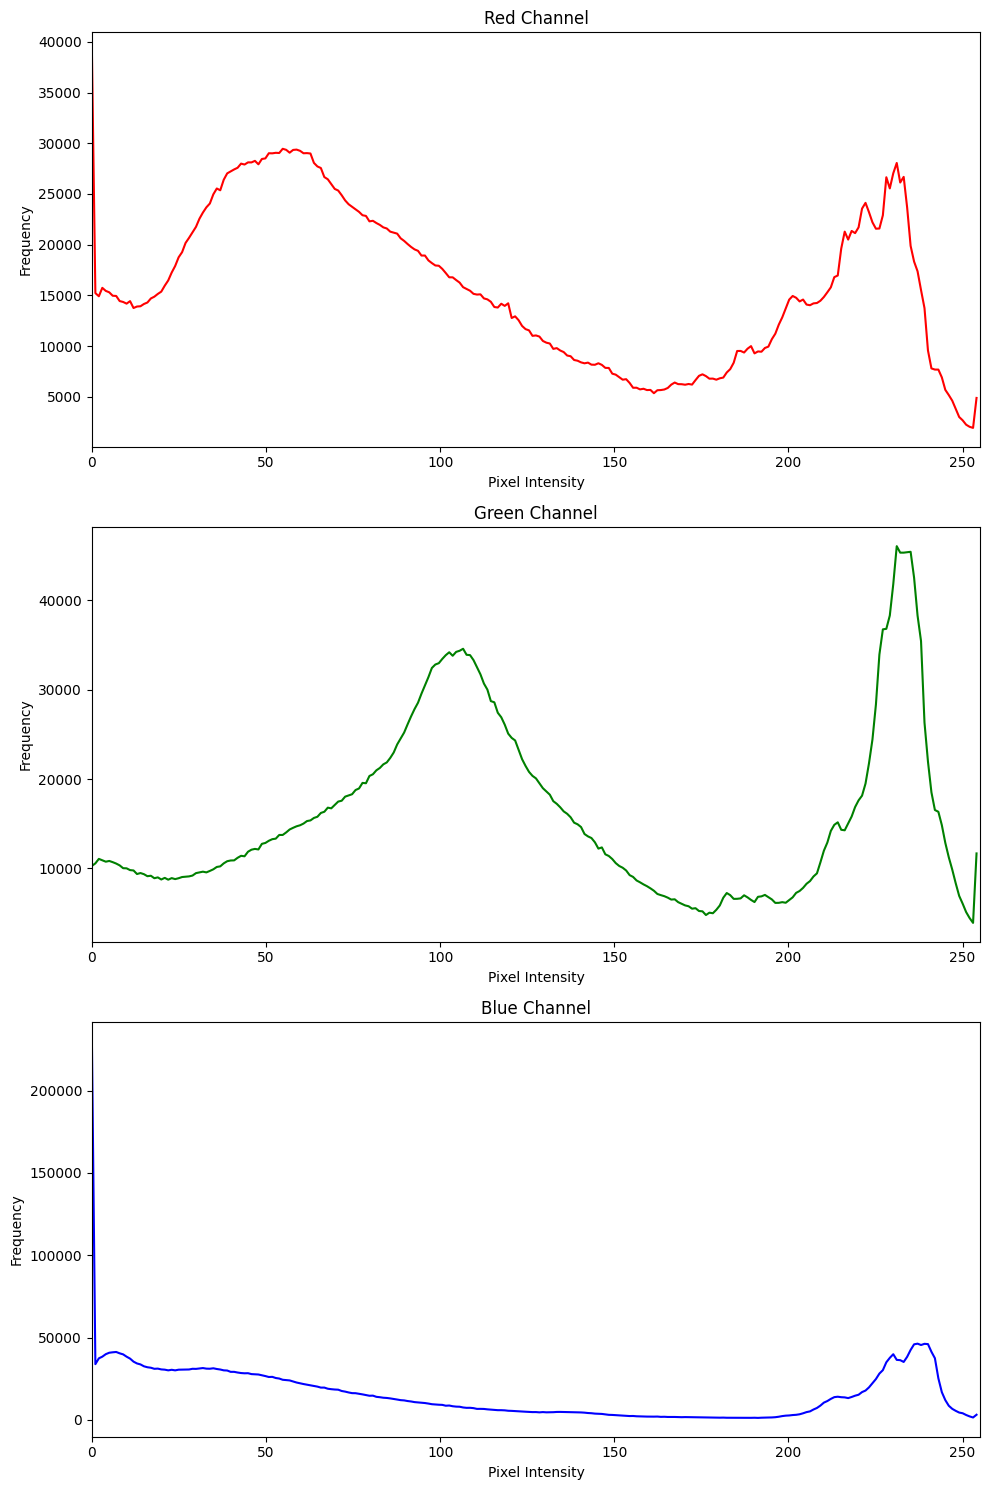

In [7]:
# Plot histograms for each color channel
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
colors = ('r', 'g', 'b')
titles = ('Red Channel', 'Green Channel', 'Blue Channel')

for i, (color, title) in enumerate(zip(colors, titles)):
    plot_histogram(image_rgb[:, :, i], title, axs[i], color)

plt.tight_layout()
plt.show()

In [8]:
# Function to plot cumulative histograms
def plot_cumulative_histogram(image, title, ax, color):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
    cumulative_histogram = np.cumsum(histogram)
    ax.plot(bin_edges[0:-1], cumulative_histogram, color=color)
    ax.set_xlim(0, 255)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Cumulative Frequency')

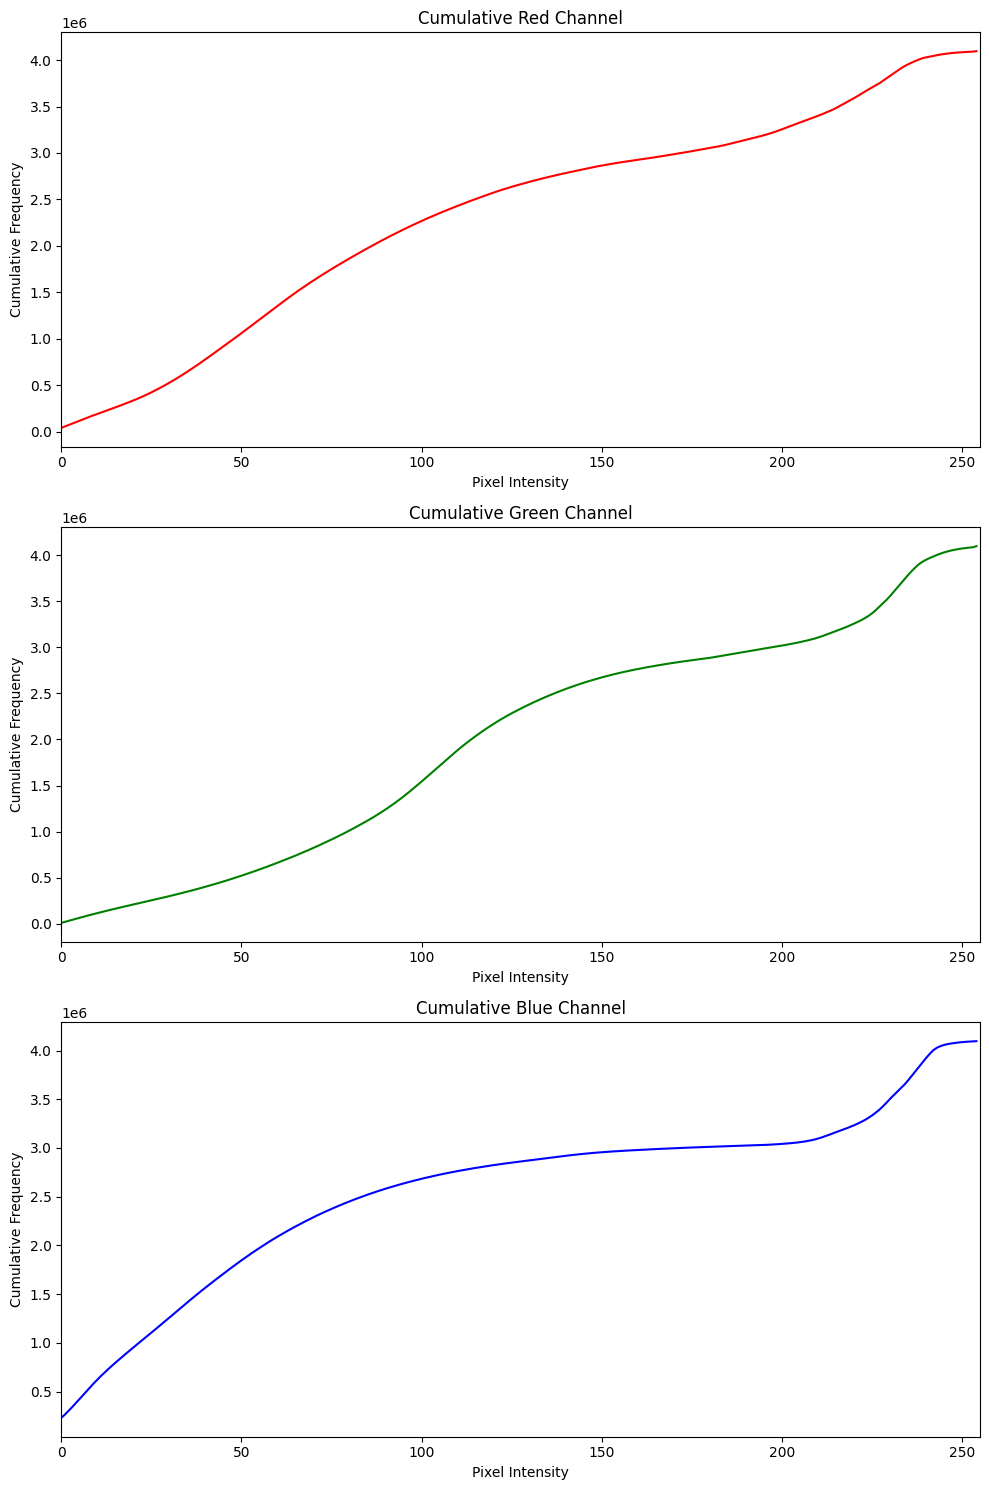

In [9]:
# Plot cumulative histograms for each color channel
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, (color, title) in enumerate(zip(colors, titles)):
    plot_cumulative_histogram(image_rgb[:, :, i], 'Cumulative ' + title, axs[i], color)

plt.tight_layout()
plt.show()

In [15]:
# Compute and print mean and standard deviation for each channel
for i, color in enumerate(('Red', 'Green', 'Blue')):
    mean_val = np.mean(image_rgb[:, :, i])
    std_val = np.std(image_rgb[:, :, i])
    print(f'{color} Channel - Mean: {mean_val:.2f}, Standard Deviation: {std_val:.2f}')

Red Channel - Mean: 110.08, Standard Deviation: 74.19
Green Channel - Mean: 131.78, Standard Deviation: 70.82
Blue Channel - Mean: 95.43, Standard Deviation: 88.06


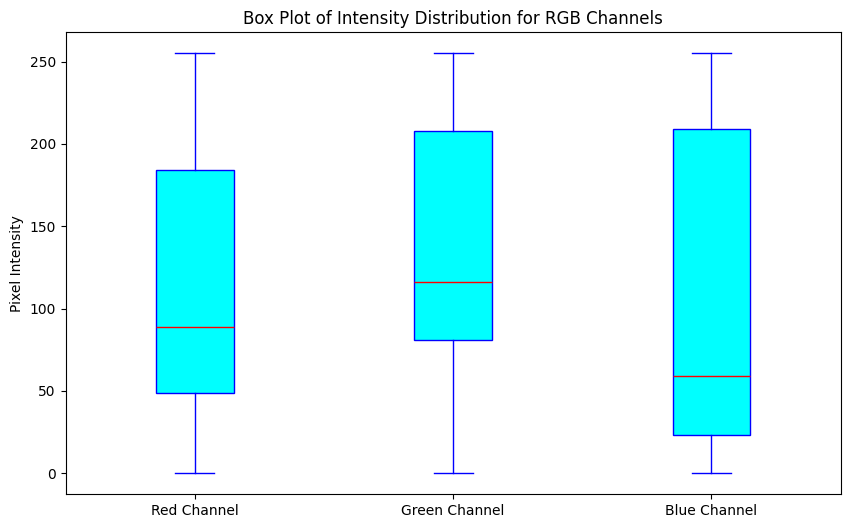

In [16]:
# Plot box plots for intensity distribution
fig, ax = plt.subplots(figsize=(10, 6))

data = [image_rgb[:, :, i].flatten() for i in range(3)]
ax.boxplot(data, patch_artist=True, labels=['Red Channel', 'Green Channel', 'Blue Channel'], 
           boxprops=dict(facecolor='cyan', color='blue'), 
           medianprops=dict(color='red'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='blue'))

ax.set_title('Box Plot of Intensity Distribution for RGB Channels')
ax.set_ylabel('Pixel Intensity')
plt.show()